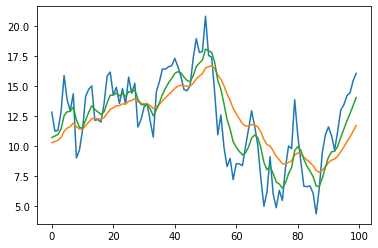

In [5]:
import numpy as np
import matplotlib.pyplot as plt

### EMA ###
def ema_0(p, u):
    a = 0.1
    return a*p + (1 - a)*u

# Curve V2 EMA
# b**x = e**(x*ln(b))
# (1/2)**x = e**(-x*ln(2))
def half_pow(x):
    return 0.5**(x/1e18) * 1e18

def ema_1(p, u):
    dt = 2*600
    T = 600
    a = half_pow(dt/T*1e18)
    return (p*(1e18 - a) + u*a) / 1e18

### Plot ###
N = 100

# initial price
p0 = 10

# volatility
v = 2
delta_prices = np.random.normal(0, v, N)

p = p0
prices = []
for dp in delta_prices:
    p += dp
    prices.append(p)

avgs = [[], []]
u = [p0, p0]
for p in prices:
    u[0] = ema_0(p, u[0])
    u[1] = ema_1(p, u[1])
    avgs[0].append(u[0])
    avgs[1].append(u[1])

plt.plot(prices)
plt.plot(avgs[0])
plt.plot(avgs[1])
plt.show()